# <center>Projet Finance</center>

## <center>Load "P3_Loan prediction"</center>

## Pre-processing :

## Import Librairies

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# ANOVA :
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
from seaborn import regplot

#TrainTest - Nettoyage - Encodage
from sklearn.model_selection import train_test_split

### Import dataset de base

In [20]:
dataTrain = pd.read_csv("csv/train.csv")
dataTrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Import du dataset clean

In [30]:
dfclean = pd.read_csv("csv/dfclean.csv")
dfclean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


## Analyse de la forme de nos données

In [31]:
df = dfclean.copy()

In [23]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
1,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,1,1
476,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,1,1
477,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
478,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


## Création des sous-ensembles :

In [24]:
# Variable qui nous donne le taux de valeurs manquantes :
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

In [26]:
# On filtre les colonnes de type comportement :
comportement = list(df.columns[(missing_rate < 0.08) & (missing_rate > 0.02)])

In [ ]:
# On fait une list de colonnes importantes ainsi que de notre target :
key_columns = ['ApplicantIncome', 'Loan_Status']

In [ ]:
# On filtre notre dataset avec les variables précedemment créées :
df = df[key_columns + comportement]
df.head()

### ANOVA

In [32]:
anova_df = df[['ApplicantIncome', 'LoanAmount']].dropna()
relate_df = df[['ApplicantIncome', 'LoanAmount']]
anova = smf.ols(formula='ApplicantIncome ~ C(LoanAmount)', data=anova_df).fit()

print(anova.summary())

# Nous pouvons également vérifier la moyenne et l'écart-type pour les groupes :
mean = relate_df.groupby("LoanAmount").mean()
sd = relate_df.groupby("LoanAmount").std()
print(mean)
print(sd)

                            OLS Regression Results                            
Dep. Variable:        ApplicantIncome   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4.511
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           8.55e-31
Time:                        20:37:04   Log-Likelihood:                -4506.2
No. Observations:                 480   AIC:                             9384.
Df Residuals:                     294   BIC:                         1.016e+04
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2378

Nous pouvons voir que le modèle donne une très petite valeur P ( statistique Prob F ) de 1, 3.79e-63 . C'est beaucoup moins que le seuil de signification habituel de 0,05 , nous concluons donc qu'il existe une relation significative entre les revenus et le montant du remboursement du prêt, en prenant en considération.

In [33]:
multi_comparison = multi.MultiComparison(anova_df["ApplicantIncome"], anova_df["LoanAmount"])
results = multi_comparison.tukeyhsd()
print(results)

864.8431  False
 236.0  239.0     -3400.0    0.9 -27598.3007  20798.3007  False
 236.0  240.0      2787.0    0.9 -21411.3007  26985.3007  False
 236.0  242.0      9999.0    0.9 -14199.3007  34197.3007  False
 236.0  243.0     -1490.0    0.9 -25688.3007  22708.3007  False
 236.0  244.0      4166.0    0.9 -20032.3007  28364.3007  False
 236.0  246.0      3333.0    0.9 -20865.3007  27531.3007  False
 236.0  250.0      1065.0    0.9 -23133.3007  25263.3007  False
 236.0  253.0      3072.0    0.9 -21126.3007  27270.3007  False
 236.0  255.0     -1167.0    0.9 -22123.3431  19789.3431  False
 236.0  258.0      2262.5    0.9 -18693.8431  23218.8431  False
 236.0  259.0      5408.0    0.9 -18790.3007  29606.3007  False
 236.0  260.0     15035.0 0.8017  -4722.8298  34792.8298  False
 236.0  267.0       417.0    0.9 -23781.3007  24615.3007  False
 236.0  275.0   6367.6667    0.9 -13390.1631  26125.4964  False
 236.0  279.0     -2339.0    0.9 -26537.3007  21859.3007  False
 236.0  280.0      3333.

Si la rejectcolonne a une étiquette de False, nous savons qu'il est recommandé de rejeter l' hypothèse nulle et de supposer qu'il existe une différence significative entre les deux groupes comparés. Dans notre cas il existe une correspondance.

## TrainTest - Nettoyage - Encodage

In [34]:
trainset, testset = train_test_split(df, test_size = 0.2, random_state=0)

In [35]:
trainset['Loan_Status'].value_counts()

1    271
0    113
Name: Loan_Status, dtype: int64

In [36]:
testset['Loan_Status'].value_counts()

1    61
0    35
Name: Loan_Status, dtype: int64

In [37]:
# On créée un dictionnaire qui va relier les categories avec emprunts et sans emprunt à des nombres :
code = {'Y':1,
        'N':0}

In [61]:
# On applique le dictionnaire à tous les élements de chaque colonne que l'on rencontre de type object :
for col in df.select_dtypes('object'):
    df[col] = df[col].map(code)

In [39]:
df.dtypes.value_counts()

int64      8
float64    4
dtype: int64

In [156]:
# On applique le dictionnaire à tous les élements de chaque colonne que l'on rencontre de type int64 :
#for col in df.select_dtypes('int64'):
    #df[col] = df[col].map(code)

In [42]:
def encodage(df):
    code = {'Y':1,
        'N':0}
    for col in df.select_dtypes('object'):
        df[col] = df[col].map(code)

    return df

In [43]:
# On élimine nos variables manquantes (mauvaise solution) :
# def imputation(df):
    #return df.dropna(axis=0)

# On remplis toutes les valeurs manquantes de notre dataset par une valeur extreme (cela ne fonctionne pas non plus):
#def imputation(df):
    #df['is na'] = (df['Gender'].isna()) | (df['Dependents'].isna()) | (df['Self_Employed'].isna()) | (df['LoanAmount'].isna())
    #df = df.fillna(-999)
    #"return df

# On va sélectionner nos variables pour lutter contre l'overfeeting (peu concluant mais donne les meilleurs résultats) :
def imputation(df):
    df = df.dropna(axis=0)
    return df

In [60]:
def preprocessing(df):
    df = encodage(df)
    df = imputation(df)

    X = df.drop('Loan_Status', axis=1)
    y = df['Loan_Status']

    print(y.value_counts())
    return X,y

In [45]:
X_train, y_train = preprocessing(trainset)

1    271
0    113
Name: Loan_Status, dtype: int64


In [46]:
X_test, y_test = preprocessing(testset)

1    61
0    35
Name: Loan_Status, dtype: int64


## Modelisation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [48]:
# On test Decisien tree de 3 maniéres différentes, qui s'avéreront peu concluante :
#model = DecisionTreeClassifier(random_state=0)

# On test RandomForest :
#model = RandomForestClassifier(random_state=0)

# On test un Kbest et ANOVA (f_classif) avec les 4 meilleures entre nos variables et notre target :
model = make_pipeline(SelectKBest(f_classif, k=4), RandomForestClassifier(random_state=0))

# On test un PolynomialFeatures et PCA (qui aura pour effet d'élever chaque variable au ² et de multiplier egalement chaque variable ave ses différentes voisines), Kbest et ANOVA (f_classif) avec les 4 meilleures entre nos variables et notre target (on se rapproche de bon résultats) :
#model = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=4), RandomForestClassifier(random_state=0))

In [69]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias= False), SelectKBest(f_classif, k=10))

In [70]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
Svm = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
Knn = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [71]:
dict_of_models = {'RandomForest' : RandomForest, 'AdaBoost' : AdaBoost, 'Svm' : Svm, 'Knn' : Knn}

RandomForest
[[16 19]
 [ 5 56]]
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        35
           1       0.75      0.92      0.82        61

    accuracy                           0.75        96
   macro avg       0.75      0.69      0.70        96
weighted avg       0.75      0.75      0.73        96

AdaBoost
[[16 19]
 [ 6 55]]
              precision    recall  f1-score   support

           0       0.73      0.46      0.56        35
           1       0.74      0.90      0.81        61

    accuracy                           0.74        96
   macro avg       0.74      0.68      0.69        96
weighted avg       0.74      0.74      0.72        96

Svm
[[13 22]
 [ 0 61]]
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        35
           1       0.73      1.00      0.85        61

    accuracy                           0.77        96
   macro avg       0.87      0.69      0.69  

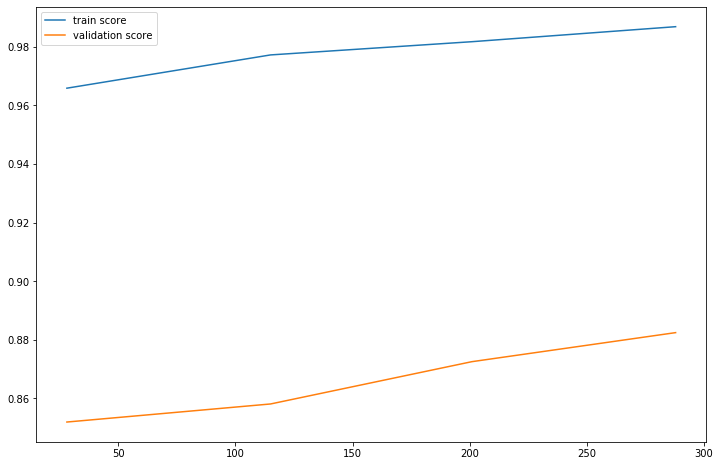

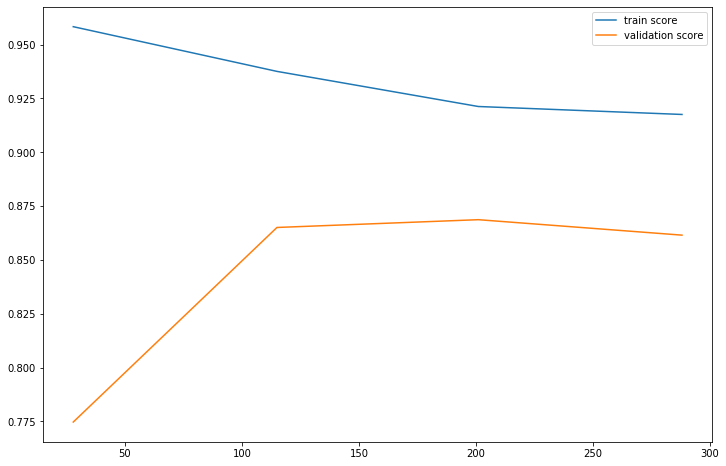

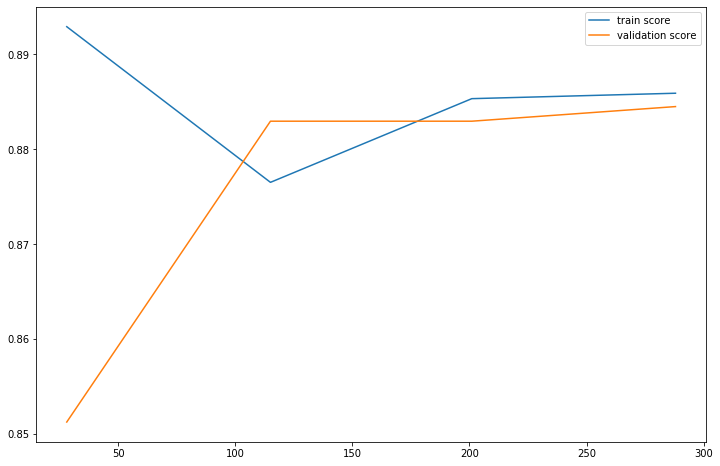

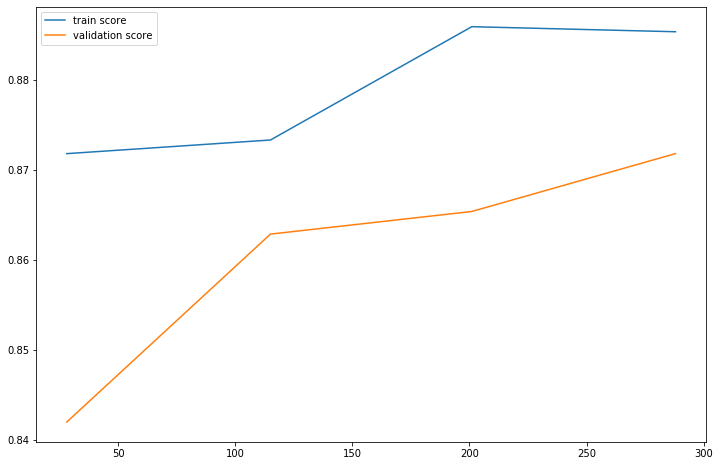

In [66]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## Procédure d'évaluation :

In [65]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# Pour voir si notre model est en over ou under feeting :
from sklearn.model_selection import learning_curve

In [67]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, 4))

    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[14 21]
 [ 3 58]]
              precision    recall  f1-score   support

           0       0.82      0.40      0.54        35
           1       0.73      0.95      0.83        61

    accuracy                           0.75        96
   macro avg       0.78      0.68      0.68        96
weighted avg       0.77      0.75      0.72        96



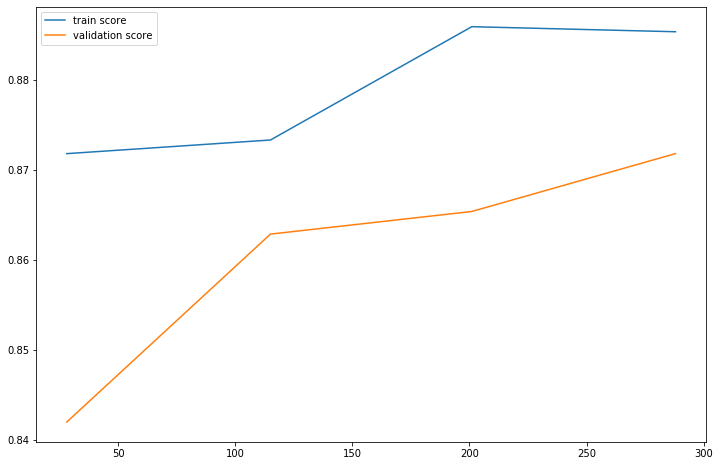

In [68]:
evaluation(model)